# **Graded Challenge 4 Phase 1**

# **I. Perkenalan**

Nama : Muhammad Farhan Darmawan

Batch : RMT 019

## Objective :

Problem Statement :

Melakukan clustering pada credit card user behaviour

Latar Belakang :

Sebagai freelance datasciene kamu di hire oleh suatu perusahaan untuk melihat bagaimana behavior user kartu kredit dan meminta kamu untuk melakukan clustering terhadap user tersebut

# **II. Query SQL**

```
SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_019_rmt.credit-card-information` WHERE MOD(CUST_ID, 2) = 1
```

# **III. Import Libraries**

In [1]:
# Import library yang digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Preprocessing
from sklearn.impute import SimpleImputer #Outlier / Missing Value
from feature_engine.outliers import Winsorizer # Caping Missing Value
from sklearn.preprocessing import MinMaxScaler

# Correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model
# K-Means
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Evaluasi
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity

# Save Model
import joblib
import pickle
import json

import warnings
warnings.filterwarnings("ignore")

# **IV. Data Loading**

In [2]:
# Me-loading data
data = pd.read_csv('h8dsft_P1G4_Farhan.csv')
pd.set_option('display.max_columns', None)

In [3]:
# Menampilkan 10 data teratas
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


In [4]:
# Menampilkan 10 data terbawah
data.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


In [5]:
# Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [6]:
# Cek duplikasi data
data.duplicated(keep = False).sum()

0

In [7]:
# Menampilkan matrix data
data.shape

(4475, 18)

# **V. Exploratory Data Analysis**

In [8]:
# Menghapus kolom 
data = data.drop(['CUST_ID'], axis=1)

In [9]:
# Menampilkan informasi statistik pada data numerikal
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


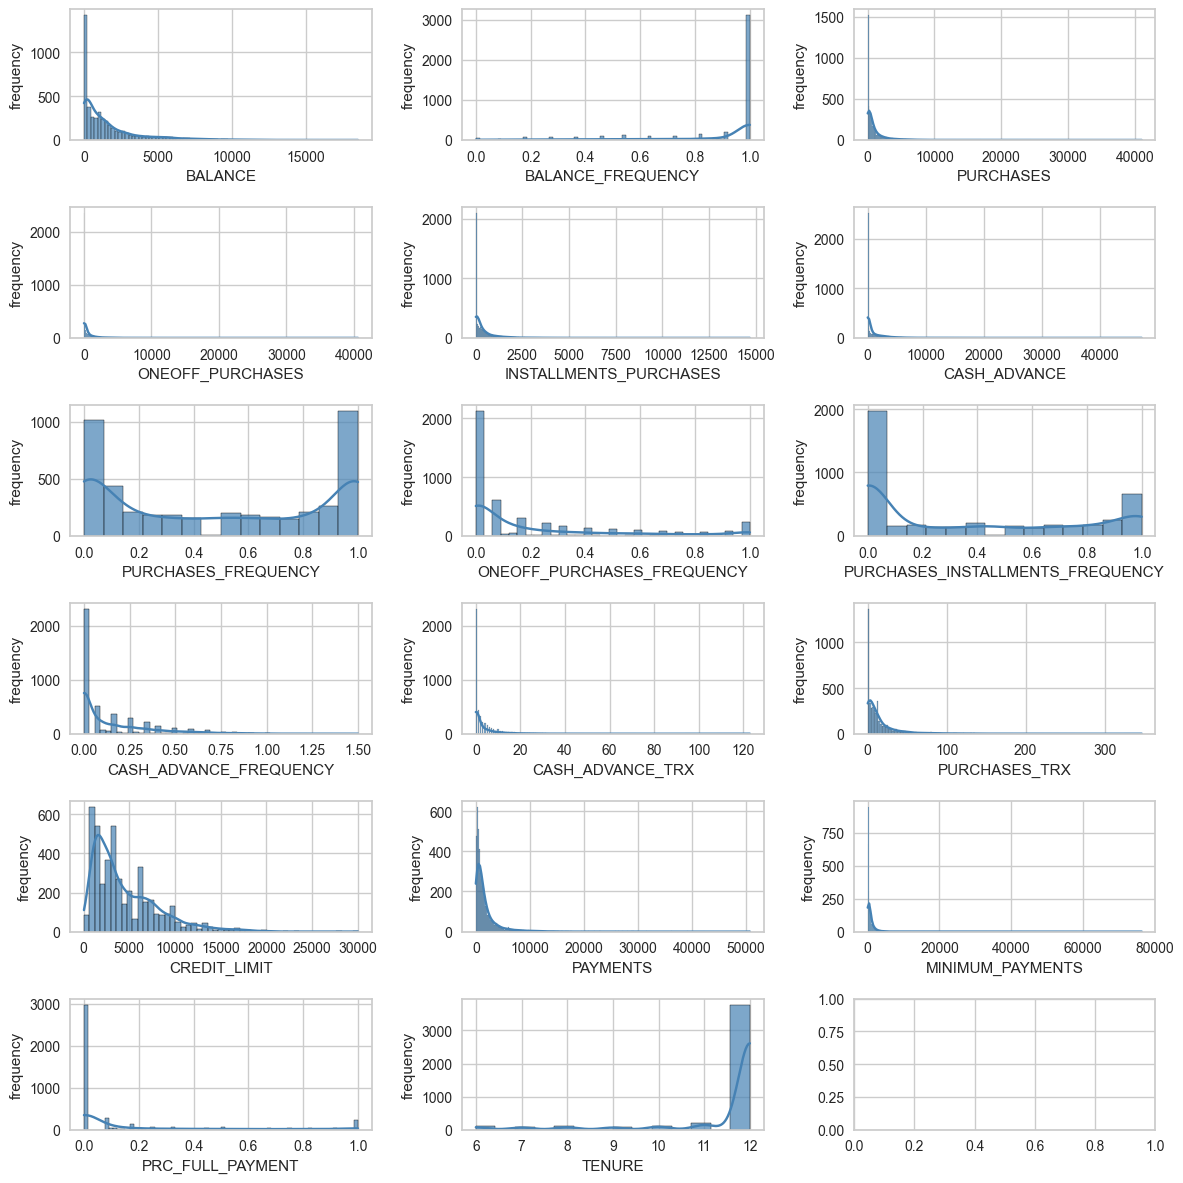

In [10]:
# Membuat subplot
fig, axes = plt.subplots(6, 3, figsize=(12, 12))

# Mendapatkan daftar kolom dalam DataFrame
columns = data.columns

# Melakukan looping untuk membuat histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        # Membuat histogram
        sns.histplot(data=data, x=columns[i], kde=True, color='steelblue', alpha=0.7, ax=ax)
        ax.set_xlabel(columns[i])
        ax.set_ylabel('frequency')

# Menyusun tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

In [11]:
data_cat = data.loc[:,['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
                     'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']]
data_num = data.loc[:,['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                     'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']]

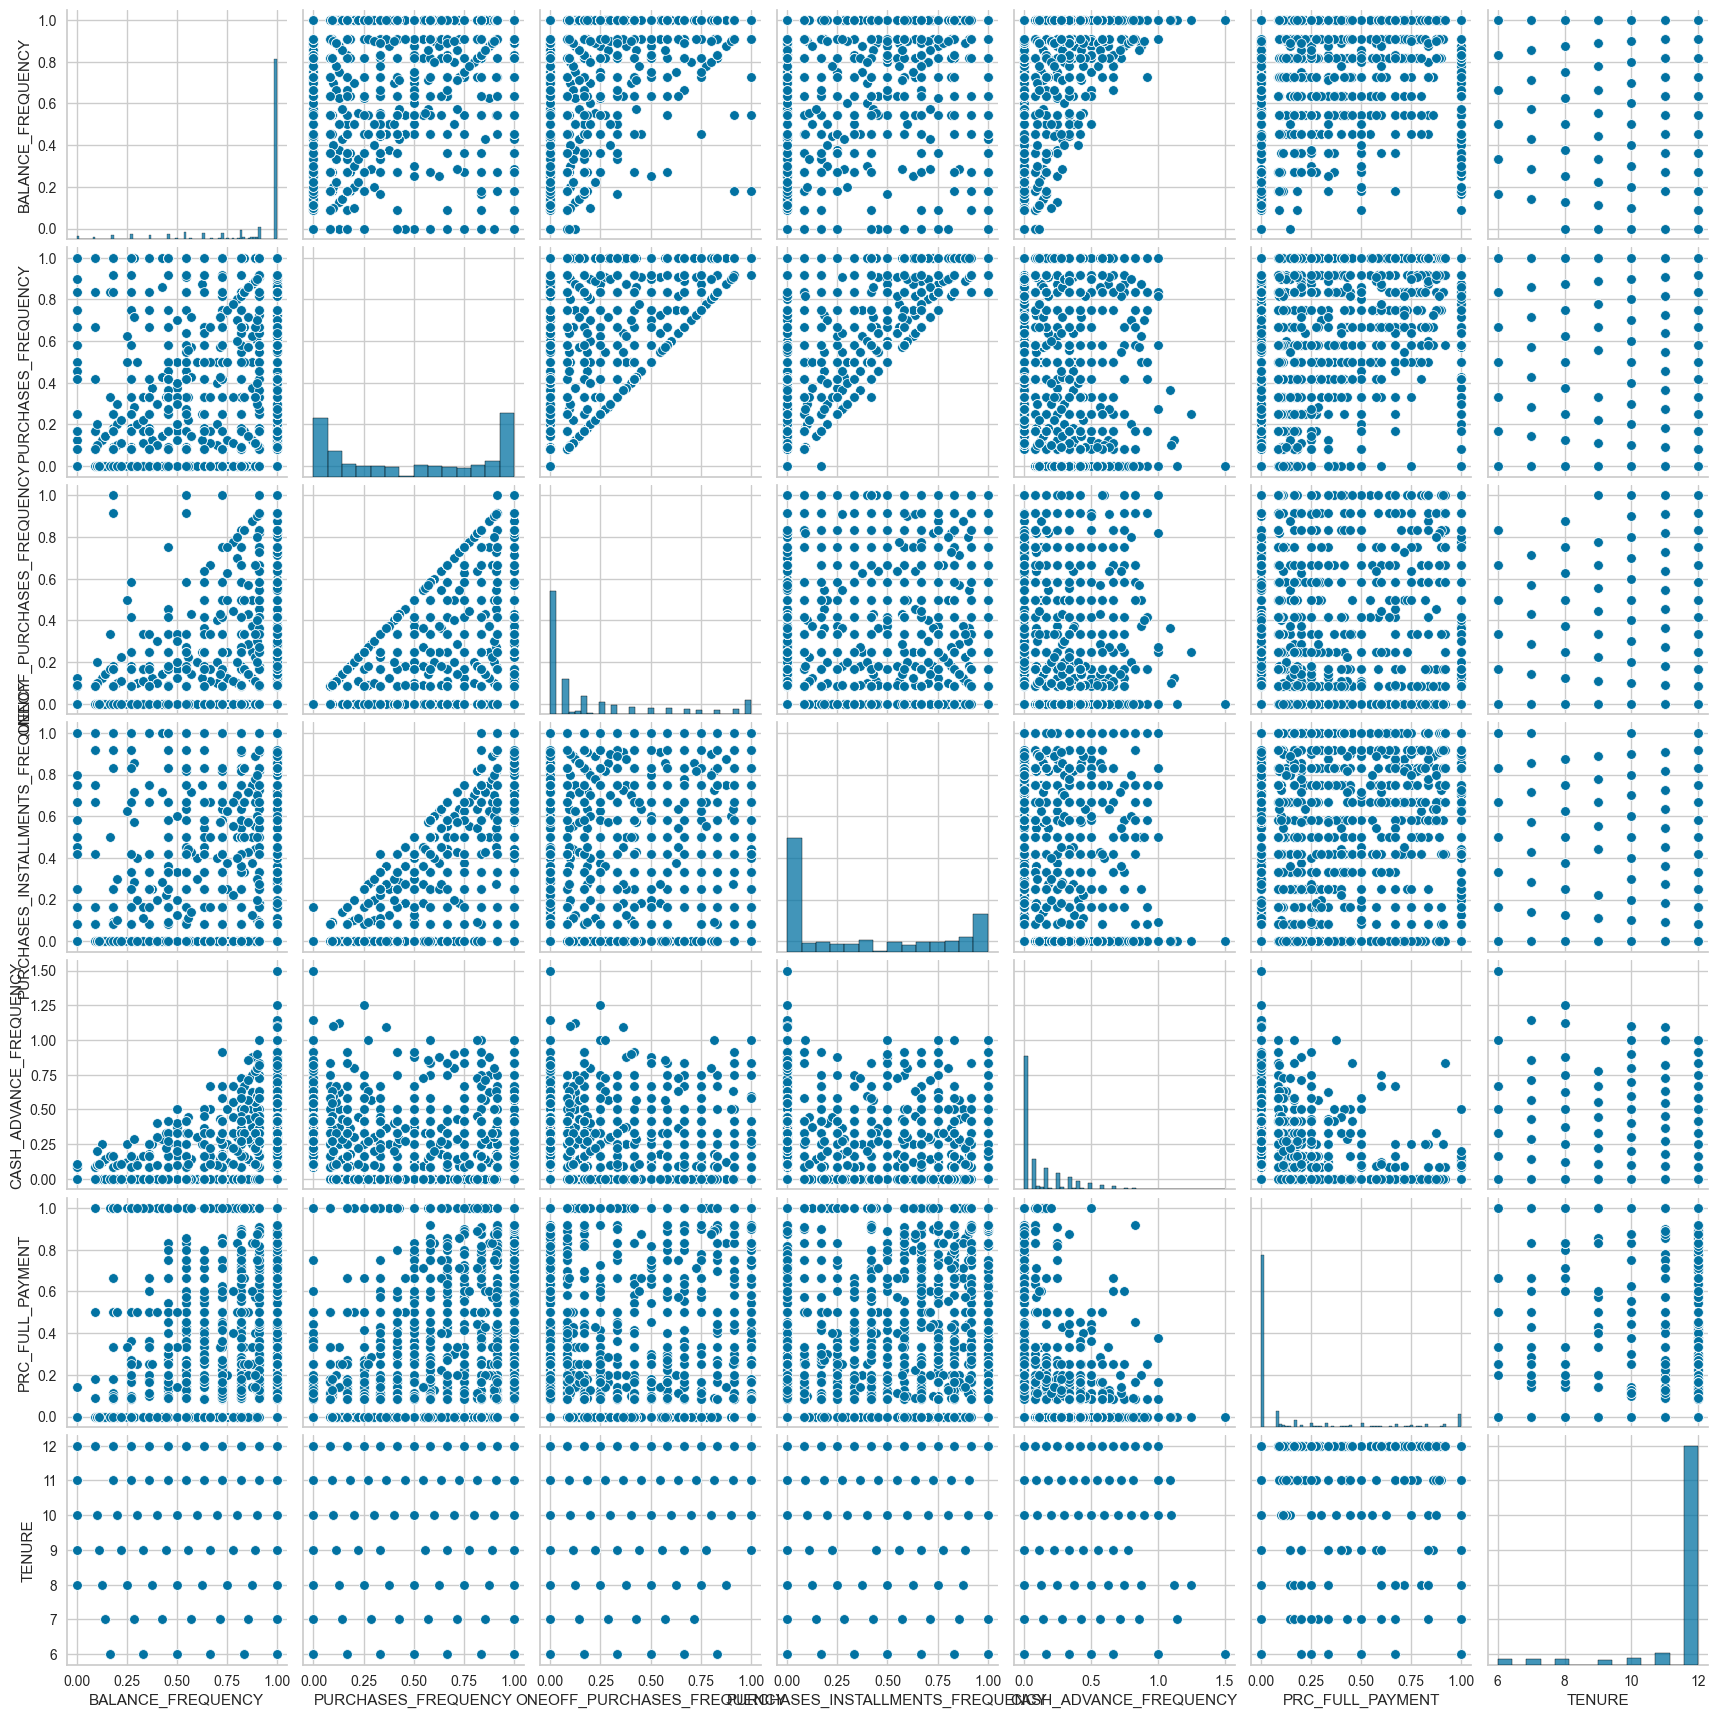

In [12]:
# Menampilkan scatterplot
sns.pairplot(data = data_cat)

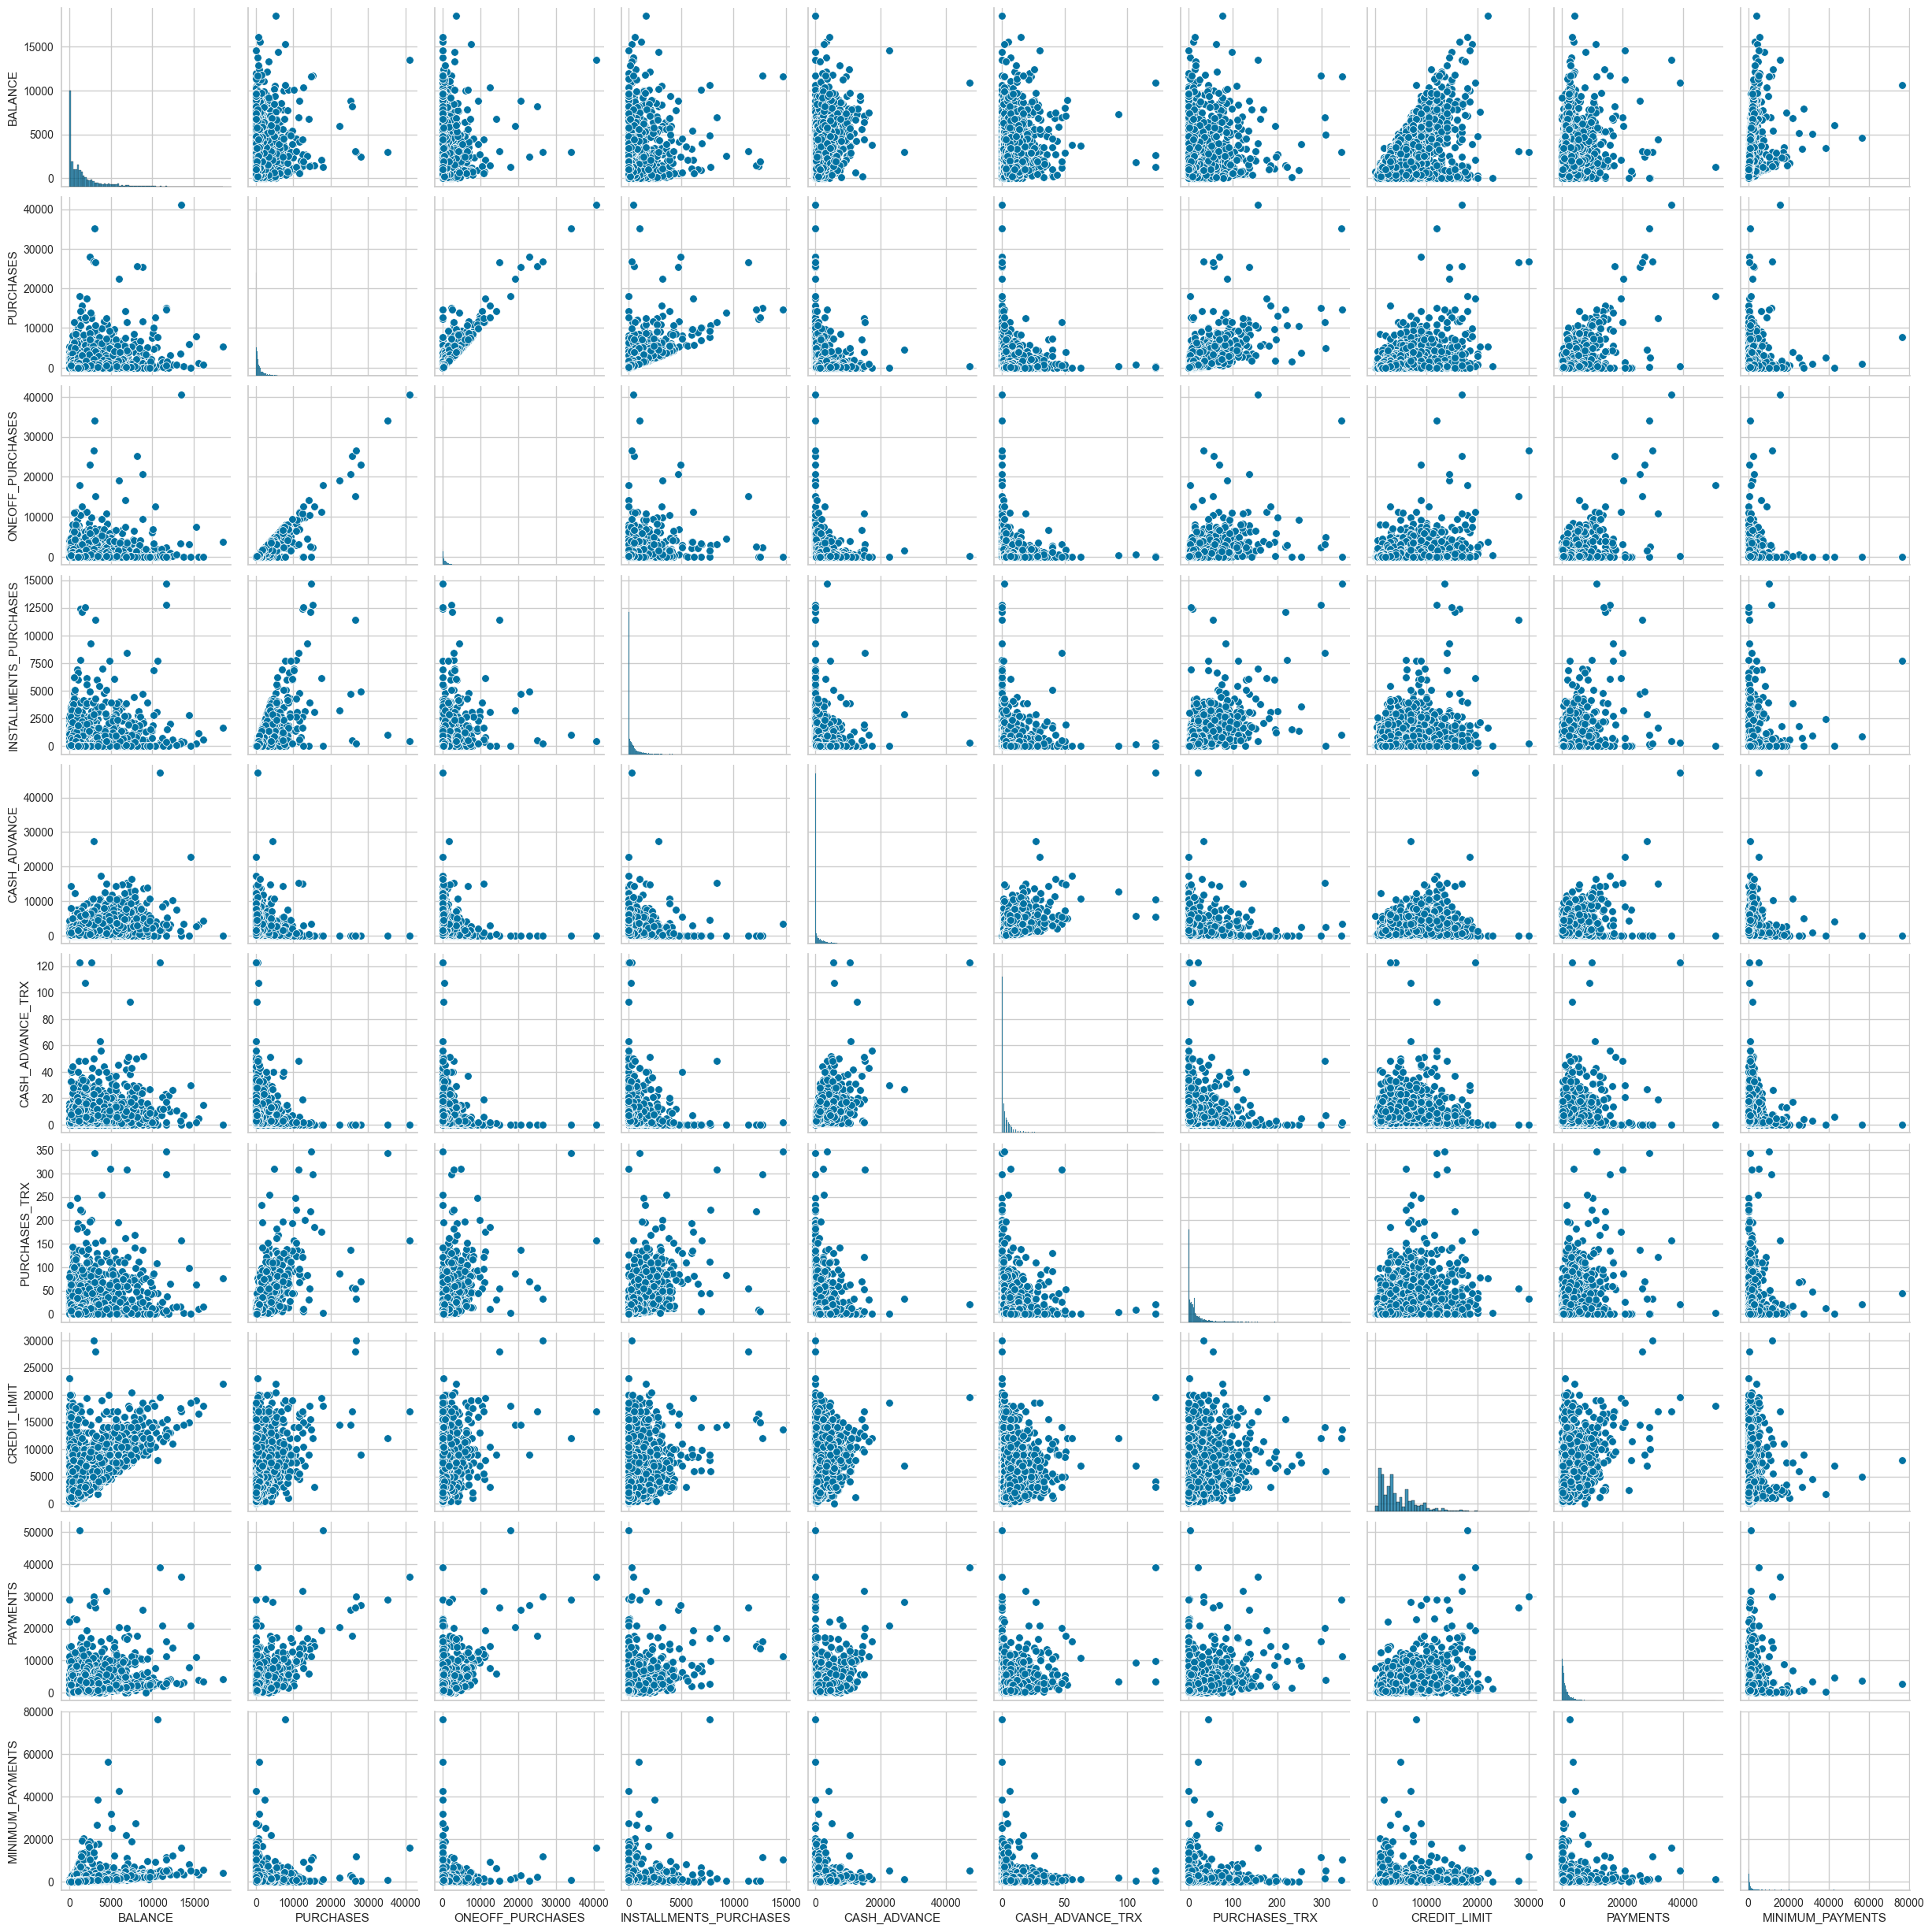

In [13]:
# Menampilkan scatterplot
sns.pairplot(data = data_num)

<Axes: >

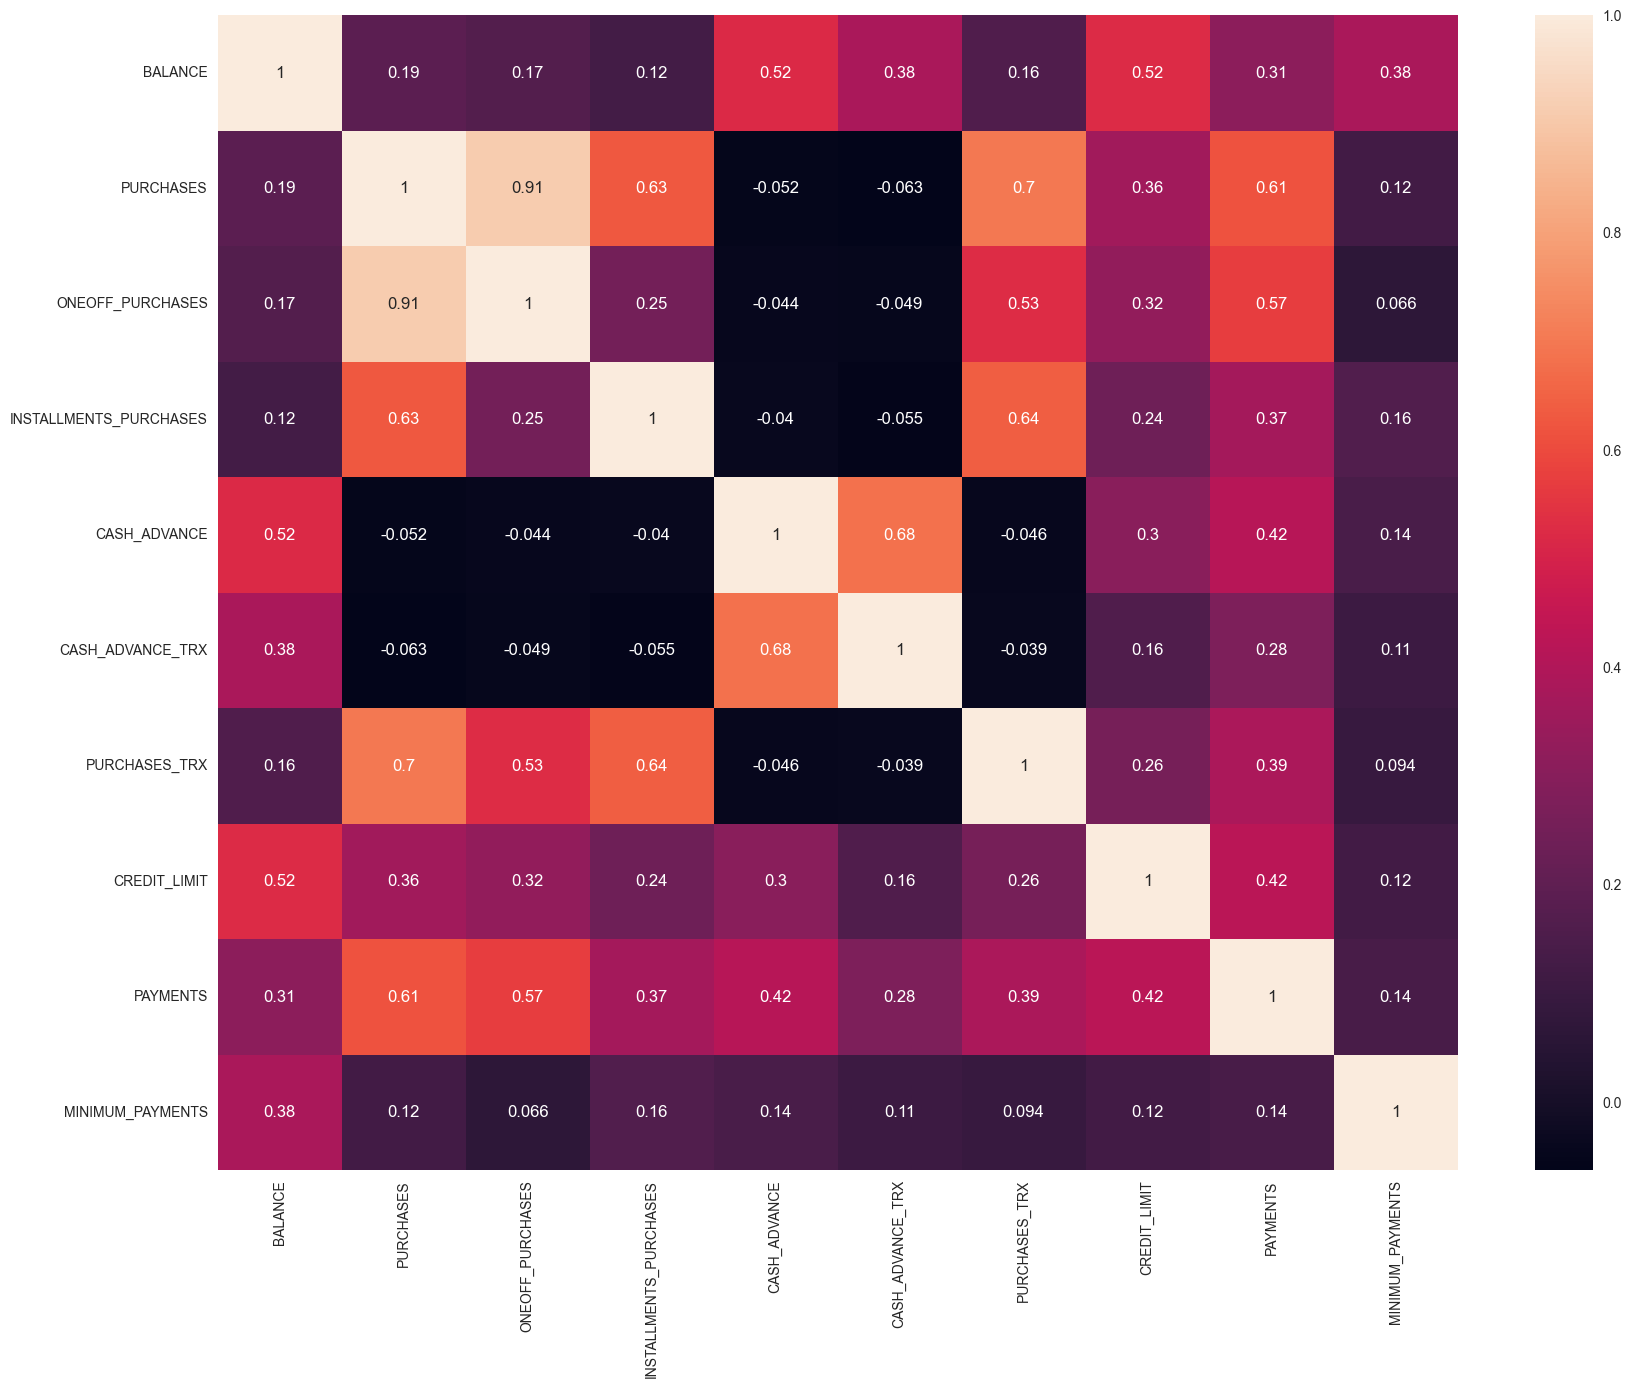

In [14]:
# Menampilkan korelasi pearson
plt.subplots(figsize=(20,15))
sns.heatmap(data_num.corr(),annot = True)

Statement :

-  Dari 4500 nasabah, nasabah jarang membeli barang sekali transaksi, sisa saldo nasabah kebanyakan  rendah-hampir tidak ada, credit_limit terbanyak nasabah < 5000, nasabah jarang menggunakan sistem cicilan pada transaksi, namun nasabah sangat senang membeli barang menggunakan kartu kredit 

- Seluruh data memiliki distribusi data yang tidak normal

- Pada data numerikal setiap feature memiliki korelasi yang bervariasi

# **VI. Feature Engineering**

## Handling Cardinality

Pada dataset ini tidak dilakukan handling cardinality

## Handling Missing Values

In [15]:
# Check Missing Value
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
# Mengubah data null menggunakan simple imputer
imp_med = SimpleImputer(missing_values=np.nan, strategy='median') # median untuk data skewed distribution
data_nn = imp_med.fit_transform(data)

In [17]:
# Check Missing Value setelah dihandling
data = pd.DataFrame(data_nn, columns = data.columns.tolist())
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Handling Outlier

### Grafik Histogram dan Boxplot

In [18]:
def diagnostic_plots(df):
    num_cols = len(df.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4*num_rows))
    
    for i, column in enumerate(df.columns):
        row = i // 2
        col = i % 2
        
        ax = axes[row, col]
        sns.boxplot(df[column], ax=ax)
        ax.set_title('Boxplot of ' + column)
        
        skewness = df[column].skew()
        ax.text(0.5, 0.95, f'Skewness: {skewness:.2f}', transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='top',
                bbox={'boxstyle': 'round', 'facecolor': 'white', 'alpha': 0.8})
    
    plt.tight_layout()
    plt.show()


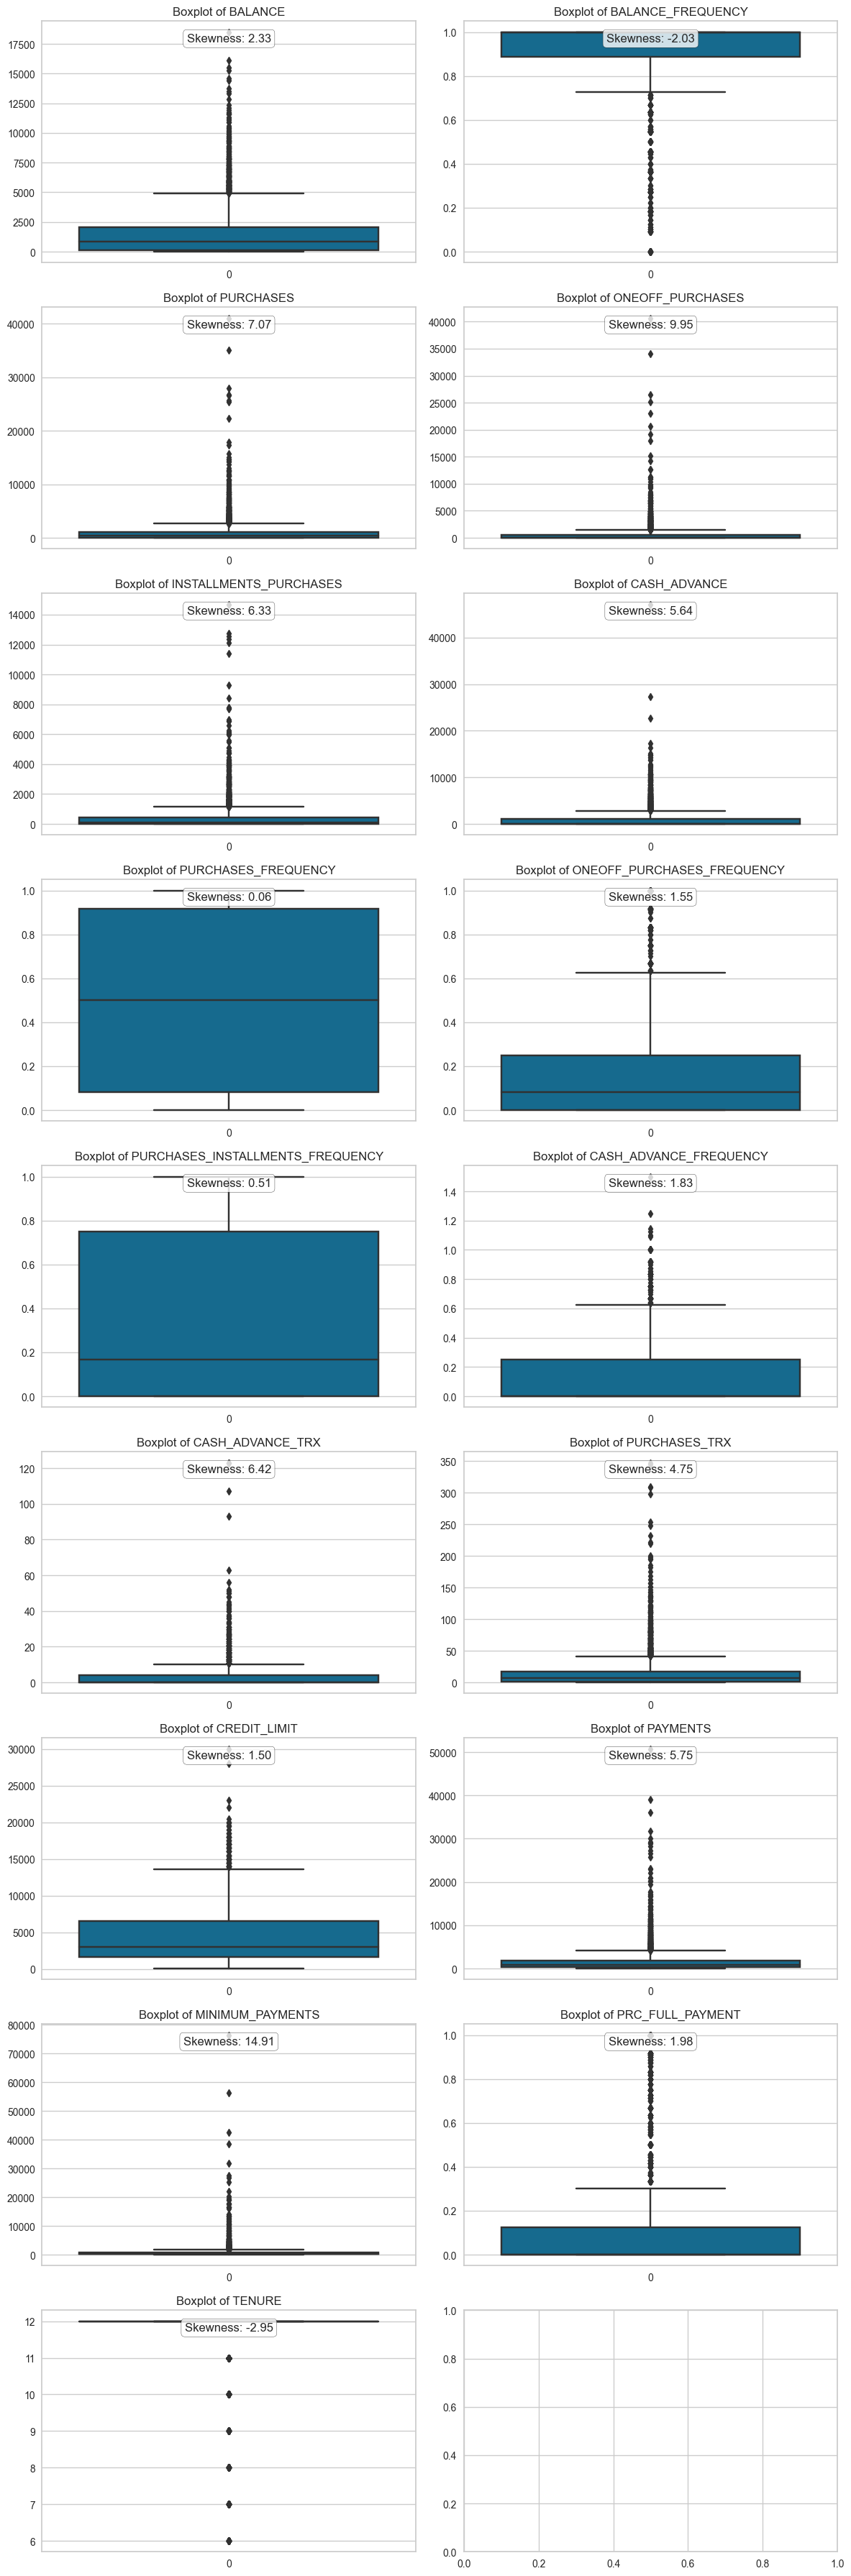

In [19]:
# Menampilkan grafik histogram dan boxplot
diagnostic_plots(data)

### Capping Outlier

Secara personal saya akan menggunakan cara capping karena dari seluruh data nilai outlier termasuk kedalam `natural outlier`

In [20]:
# Membuat capper pada data train
windsoriser = Winsorizer(capping_method='iqr',
                         tail='both',
                         fold=1.5,
                         variables=(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
                                    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT',
                                    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                                    'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'])
                         )

windsoriser.fit(data)
data_t = windsoriser.transform(data)

In [21]:
# Menampilkan nilai minimum dari tiap kolom
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Menampilkan nilai maximum dari tiap kolom
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'BALANCE_FREQUENCY': 0.7222225000000001, 'PURCHASES_FREQUENCY': -1.166668, 'ONEOFF_PURCHASES_FREQUENCY': -0.375, 'PURCHASES_INSTALLMENTS_FREQUENCY': -1.125, 'CASH_ADVANCE_FREQUENCY': -0.375, 'PRC_FULL_PAYMENT': -0.1875, 'BALANCE': -2760.274076, 'PURCHASES': -1554.7300000000002, 'ONEOFF_PURCHASES': -862.83, 'INSTALLMENTS_PURCHASES': -683.8275, 'CASH_ADVANCE': -1708.3316309999998, 'CASH_ADVANCE_TRX': -6.0, 'PURCHASES_TRX': -23.0, 'CREDIT_LIMIT': -5750.0, 'PAYMENTS': -1925.1121682500002, 'MINIMUM_PAYMENTS': -752.7862859999998}
Right Tail Caps :  {'BALANCE_FREQUENCY': 1.1666664999999998, 'PURCHASES_FREQUENCY': 2.166668, 'ONEOFF_PURCHASES_FREQUENCY': 0.625, 'PURCHASES_INSTALLMENTS_FREQUENCY': 1.875, 'CASH_ADVANCE_FREQUENCY': 0.625, 'PRC_FULL_PAYMENT': 0.3125, 'BALANCE': 4932.277724, 'PURCHASES': 2696.71, 'ONEOFF_PURCHASES': 1438.0500000000002, 'INSTALLMENTS_PURCHASES': 1139.7125, 'CASH_ADVANCE': 2847.2193849999994, 'CASH_ADVANCE_TRX': 10.0, 'PURCHASES_TRX': 41.0, 'CREDIT

## Feature Scaling

Dikarenakan distribusi nya tidak normal, maka `feature scaling` menggunakan `MinMaxScaler`

In [22]:
# Membagi kolom menjadi kolom scale dan non-scale
num_columns_nsc = ['TENURE']
num_columns_sc = data_t.drop(num_columns_nsc, axis = 1).columns.tolist()

In [23]:
# Membagi data menjadi data scale dan non scale
data_sc = data_t[num_columns_sc]
data_nsc = data_t[num_columns_nsc]

In [24]:
scaler = MinMaxScaler() # Menggunakan syntax MinMaxScaler()
scaler.fit(data_sc) # Melatih data train

data_sc_scaled = scaler.transform(data_sc) 

In [25]:
# Menampilkan dataframe yang sudah di scaling pada data Train
data_sc_scaled = pd.DataFrame(data_sc_scaled, columns = num_columns_sc)
data_sc_scaled


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0.000777,0.00,0.016687,0.031292,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.032609,0.000000,0.183691,0.0
1,0.000000,0.00,0.065276,0.122409,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.503623,0.000000,0.183691,0.0
2,0.153674,0.55,0.058367,0.109454,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.146341,0.083333,0.354678,1.000000,0.0
3,0.053640,0.00,0.426446,0.799694,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.083333,0.718949,0.049971,0.0
4,0.089333,1.00,0.222493,0.417232,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.068841,0.051100,0.080639,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1.000000,1.00,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.872728,0.9,0.000000,0.865942,0.585954,1.000000,0.0
4471,0.210862,1.00,0.000000,0.000000,0.0,0.488423,0.000000,0.000000,0.0,0.872728,1.0,0.000000,0.097826,0.068855,0.168487,0.0
4472,0.268196,1.00,0.000000,0.000000,0.0,0.267735,0.000000,0.000000,0.0,0.872728,1.0,0.000000,0.105072,0.245781,0.183022,0.0
4473,0.214990,1.00,0.000000,0.000000,0.0,0.518351,0.000000,0.000000,0.0,0.872728,1.0,0.000000,0.141304,0.096677,0.162105,0.0


In [26]:
# Reset Index
data_sc_scaled.reset_index(drop = True, inplace = True)
data_nsc.reset_index(drop = True, inplace = True)

In [27]:
# Menggabungkan data scaled dan non-scaled
data_final = pd.concat([data_sc_scaled, data_nsc], axis = 1)

## Feature Enconding

Untuk feature encoding tidak saya lakukan karena data sudah termasuk numeric category

## Checking Multicolinearity

#### Multicollinearity

In [28]:
# Membuat function untuk menghitung nilai VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = data_final.columns
    vif["VIF"] = [variance_inflation_factor(data_final.values, i) for i in range(data_final.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [29]:
# Menampilkan nilai VIF
calc_vif(data_final)

,variables,VIF
2,PURCHASES,28.081608
6,PURCHASES_FREQUENCY,25.866257
8,PURCHASES_INSTALLMENTS_FREQUENCY,22.081633
3,ONEOFF_PURCHASES,16.392259
10,CASH_ADVANCE_TRX,12.870515
9,CASH_ADVANCE_FREQUENCY,11.607930
11,PURCHASES_TRX,11.585195
4,INSTALLMENTS_PURCHASES,11.476395
0,BALANCE,10.640086
7,ONEOFF_PURCHASES_FREQUENCY,10.221730


Statement :

- Jika dilihat dari nilai variance inflation factor bahwa jumlah kolom yang < 5 ada 3 artinya prediksi reduksi hanya mengurangi 3 kolom saja

# **VII. Model Definition**

Pada Clustering menggunakan Model K-means dengan metode Elbow dan Silhouette

# **VIII. Model Training**

## PCA

In [30]:
# Membuat dataframe hanya tipe numerikal
data_use = data_final.copy()
data_use.shape

(4475, 17)

In [31]:
# Melakukan fit pada data_use
pca = PCA()
pca.fit(data_use)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

8

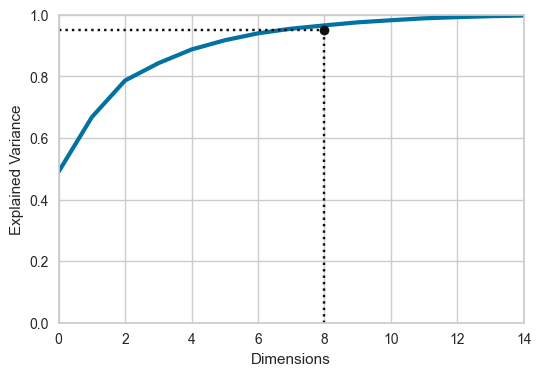

In [32]:
# Menampilkan grafik EVR
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 14, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

Saya akan memilih jumlah komponen nya 7 karena merepresentasikan 93% data tidak berbeda jauh dengan 8 komponen

In [33]:
# Memanggil dan melatih data menggunakan PCA
pca7 = PCA(n_components=7)
data_reduce = pca7.fit_transform(data_use)

In [34]:
# Mengetahui jumlah komponen 
pca7.n_components_

7

In [35]:
np.sum(pca7.explained_variance_ratio_)

0.939518942489021

## K-Means

### Elbow Method

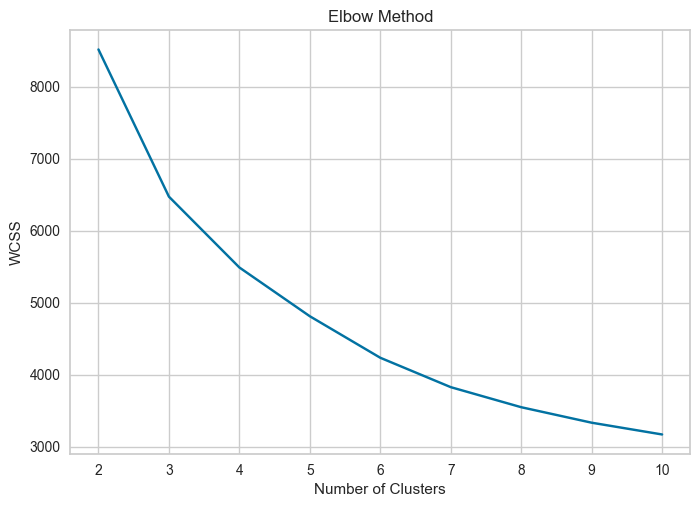

In [36]:
# Mencari nilai cluster menggunakan elbow method
kme_model = [KMeans(n_clusters=k, init= 'k-means++', max_iter= 300, n_init=10, random_state=23).fit(data_reduce) for k in range (2,11)]
inertia = [model.inertia_ for model in kme_model]

plt.plot(range(2,11), inertia)
plt.title('Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

Dari Elbow Method bisa dilihat bahwa rekomendasi kluster yaitu 5 atau 6

### Silhouette Score

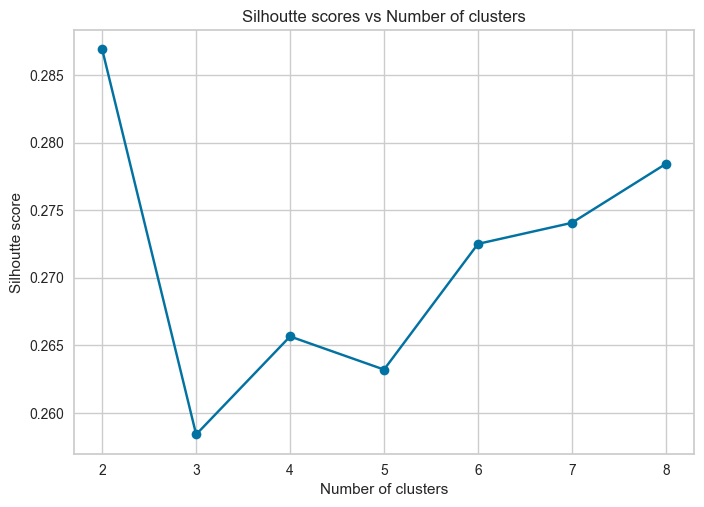

In [37]:
# Menampilkan grafik silhouette
kms_model = [silhouette_score(data_reduce, model.labels_) for model in kme_model[1:8]]
plt.plot(range(2,9), kms_model, "bo-")
plt.xticks([2, 3, 4, 5, 6, 7, 8])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

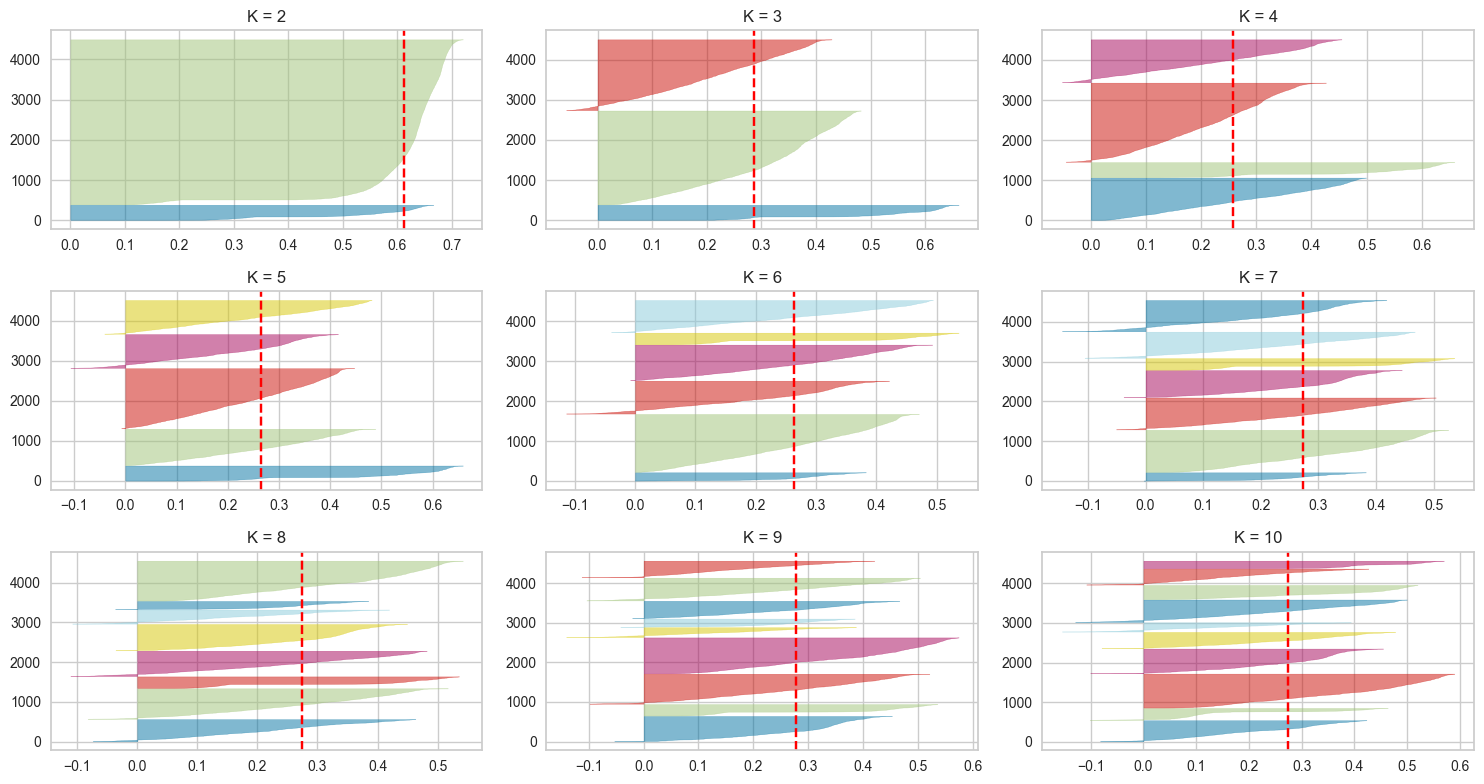

In [38]:
# Menampilkan silhouette visualizer
# Set up subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    
    # Set jumlah cluster
    n_clusters = i + 2
    
    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 300, random_state = 23)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)
    
    # Fit visualizer ke data x
    visualizer.fit(data_reduce)
    
    # Set title
    ax.set_title(f'K = {n_clusters}')
    
# Adjust layout
plt.tight_layout()
plt.show()

Dari visualizer diatas dapat dilihat bahwa rekomendasi kluster yaitu 4 karena distribusi datanya relatif hampir sama

# **IX. Model Evaluation**

In [39]:
# Melakukan training data dengan cluster 4
kmeans = KMeans(n_clusters=4, init= 'k-means++', max_iter= 300, n_init=10, random_state=23)
kmeans.fit_predict(data_reduce)

print('Silhoutte score of our model is ' + str(silhouette_score(data_reduce, kmeans.labels_)))

Silhoutte score of our model is 0.25840340783865234


In [40]:
data_use['cluster_id'] = kmeans.labels_

In [41]:
data_use.cluster_id.unique().tolist()

[1, 2, 3, 0]

In [42]:
data_use.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,0.000777,0.00,0.016687,0.031292,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.024390,0.032609,0.000000,0.183691,0.0,8.0,1
1,0.000000,0.00,0.065276,0.122409,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.024390,0.503623,0.000000,0.183691,0.0,8.0,1
2,0.153674,0.55,0.058367,0.109454,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.146341,0.083333,0.354678,1.000000,0.0,8.0,1
3,0.053640,0.00,0.426446,0.799694,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.024390,0.083333,0.718949,0.049971,0.0,8.0,1
4,0.089333,1.00,0.222493,0.417232,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.024390,0.068841,0.051100,0.080639,0.0,8.0,1


## Interpretation / EDA

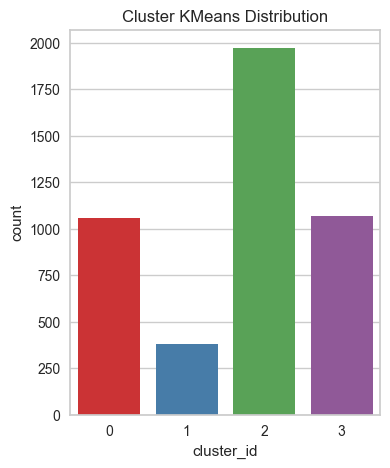

In [43]:
# visualisai berdasarkan cluster_id

plt.figure(figsize=(4, 5))
sns.countplot(data=data_use, x='cluster_id', palette='Set1')
plt.title('Cluster KMeans Distribution')
plt.show()

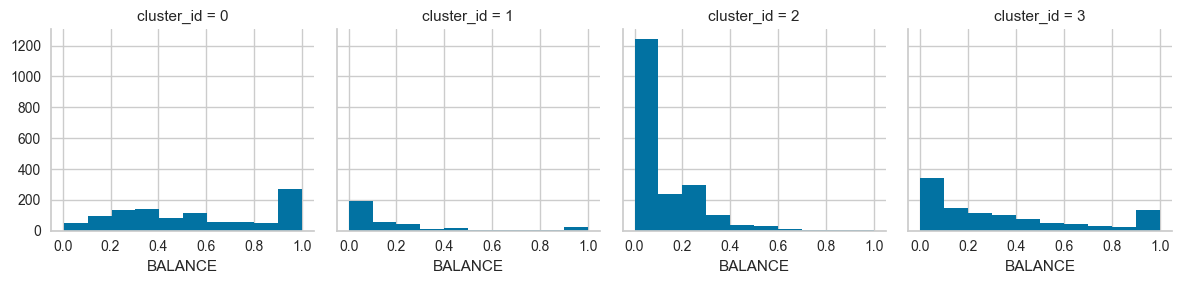

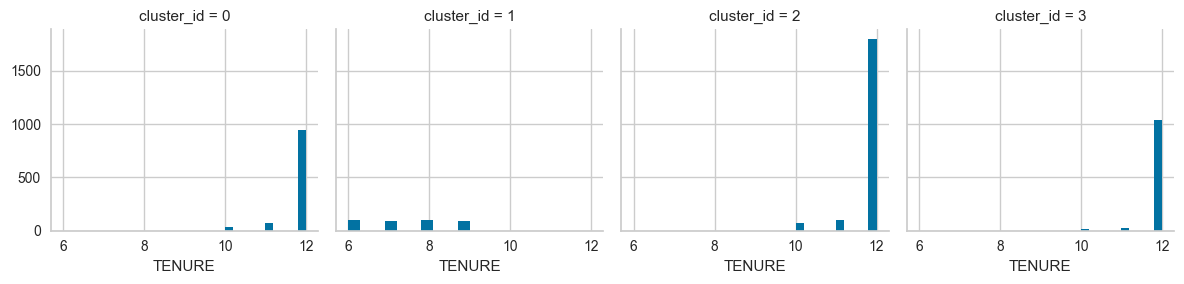

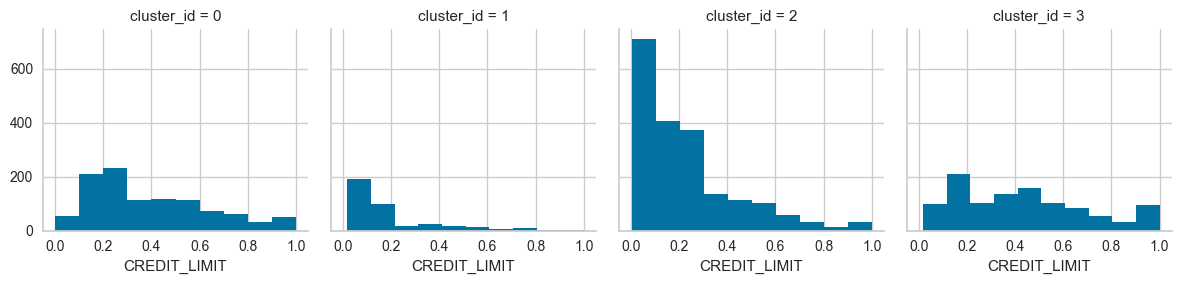

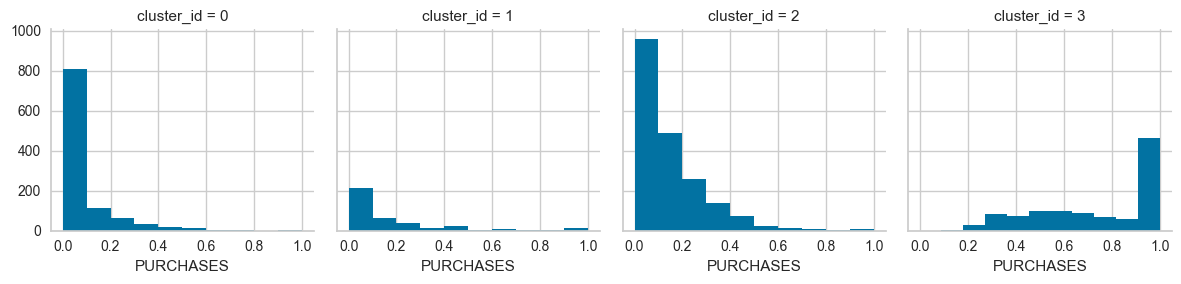

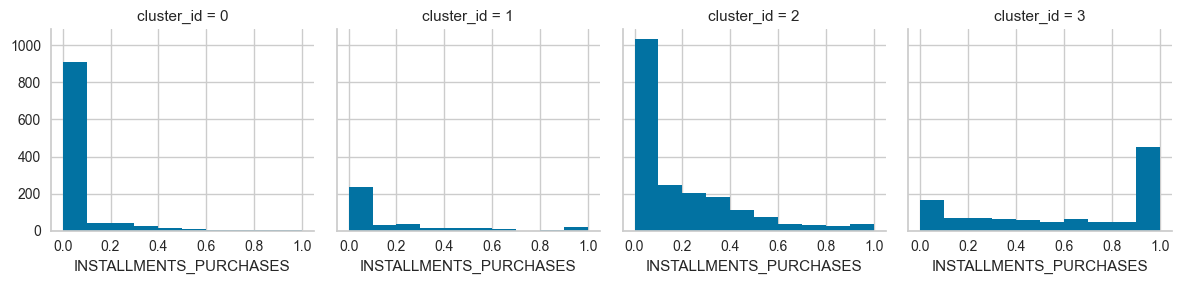

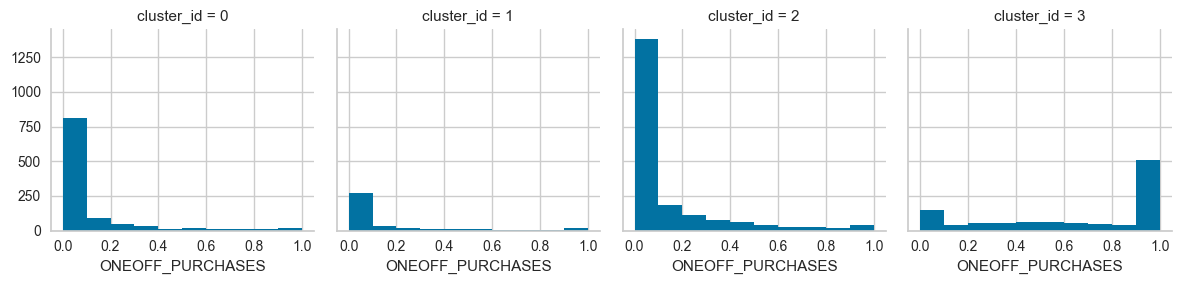

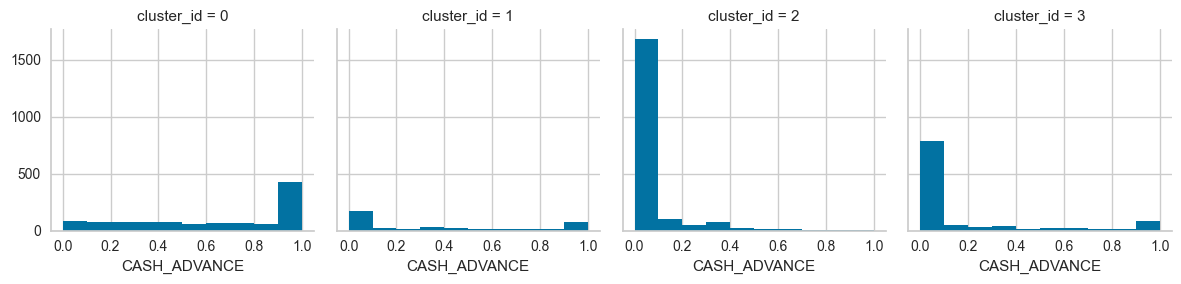

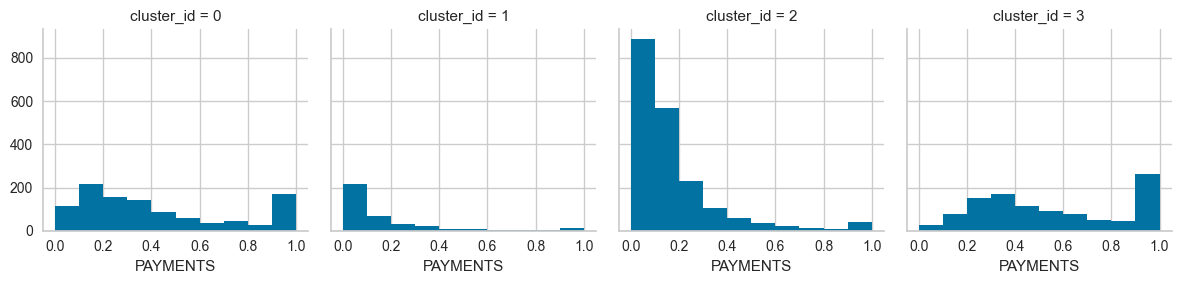

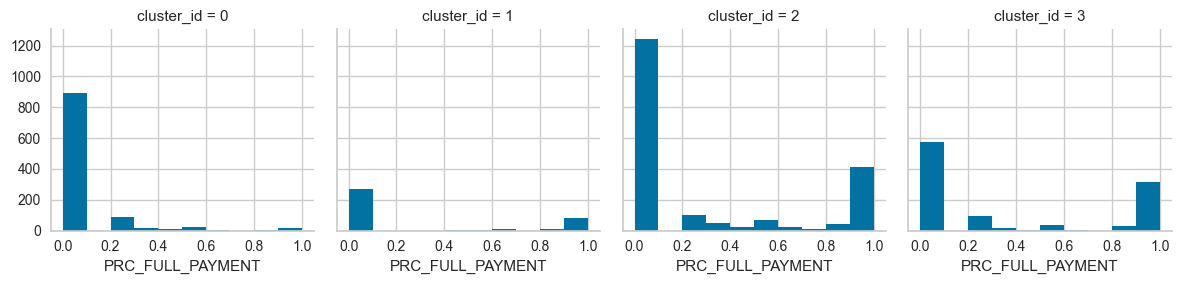

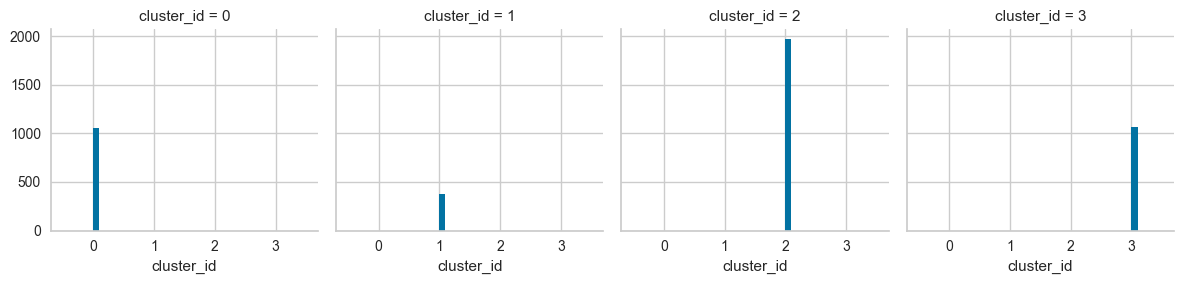

In [44]:
# Menampilkan characteristic dari tiap cluster
for c in data_use[['BALANCE', 'TENURE', 'CREDIT_LIMIT', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 
                                  'ONEOFF_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'PRC_FULL_PAYMENT', 'cluster_id']]:
    grid= sns.FacetGrid(data_use, col='cluster_id')
    grid.map(plt.hist, c)

Statement :

- Cluster terbanyak yaitu cluster 2, lalu 0, lalu 3, terakhir 1

- Cluster 0 : Nasabah non-konsumtif (mid-high balance, variance credit_limit, low purchases)

- Cluster 1 : Nasabah baru (low balance, low credit_limit, low purchases)

- Cluster 2 : Nasabah relatif konsumtif (low-mid balance, variance credit limit, mid purchases)

- Cluster 3 : Nasabah konsumtif (variance balance, variance credit_limit, high purchases)

NOTE :

- Jika di re-run akan berpotensi berubah

In [45]:
# Copy dataframe
X = data_final.copy()

In [46]:
# Mereduksi komponen menjadi 2
dist = 1 - cosine_similarity(X)

pca2 = PCA(2)
pca2.fit(dist)
X_PCA2 = pca2.transform(dist)
X_PCA2.shape

(4475, 2)

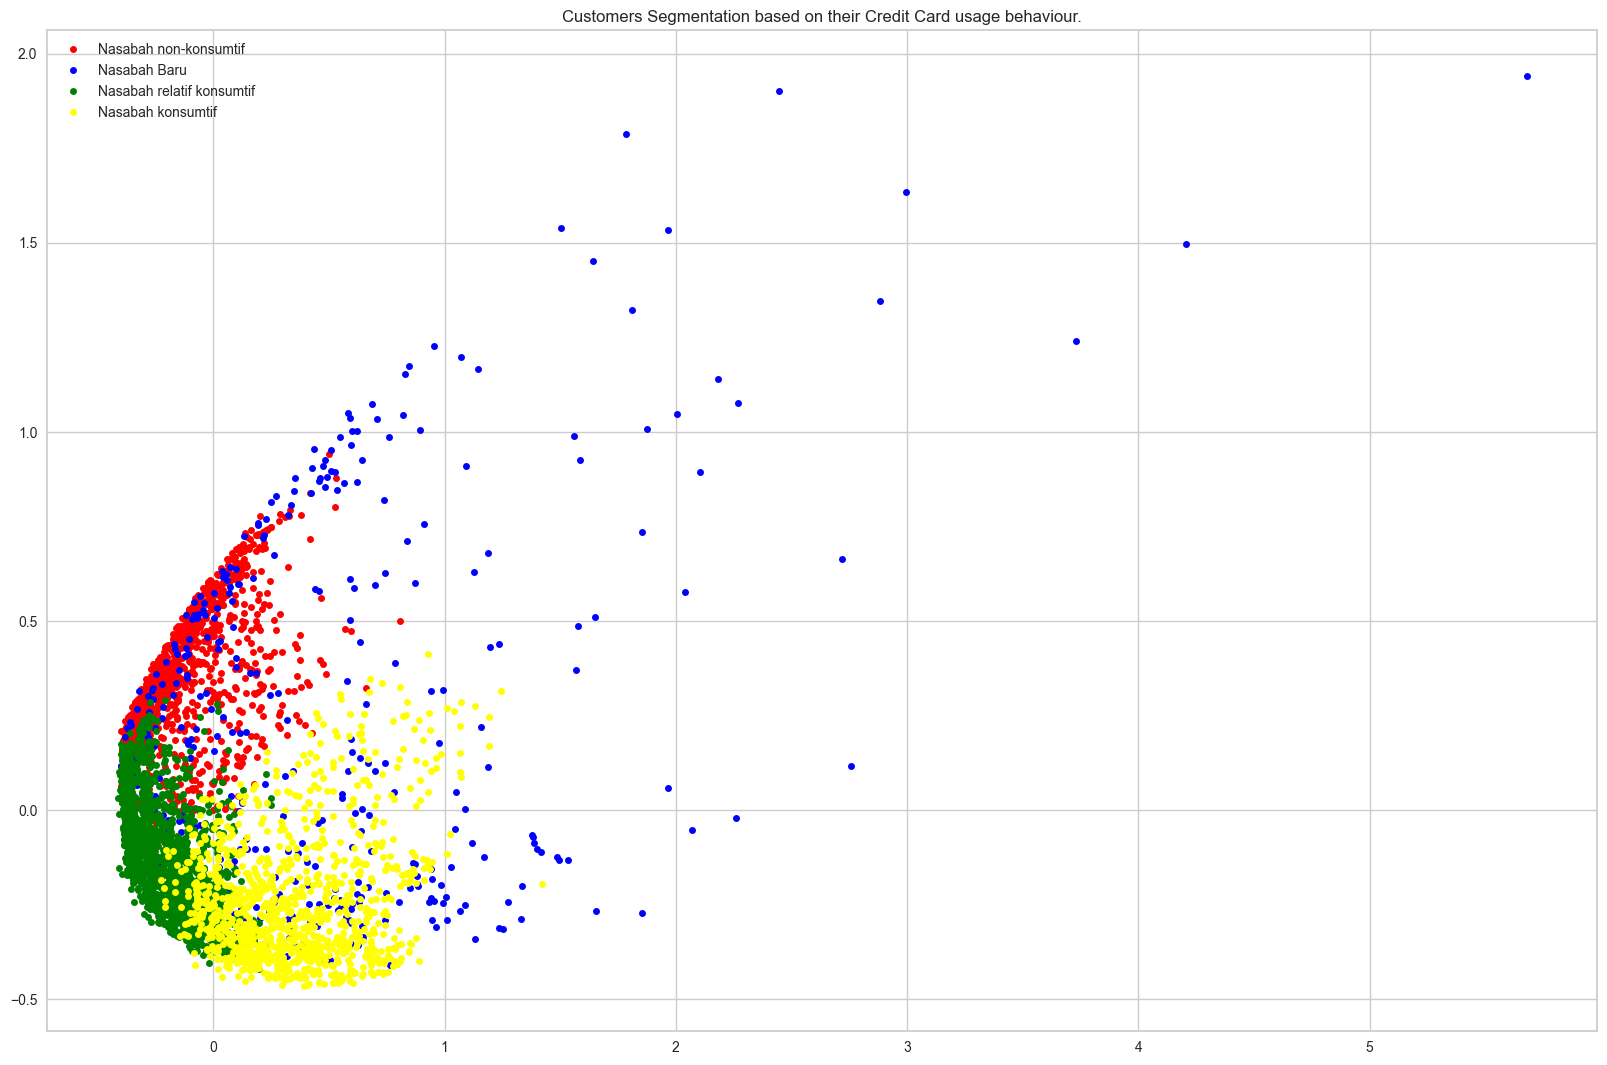

In [48]:
# Menampilkan grafik 2D scatterplot
x, y = X_PCA2[:, 0], X_PCA2[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow'}

names = {0: 'Nasabah non-konsumtif', 
         1: 'Nasabah Baru', 
         2: 'Nasabah relatif konsumtif', 
         3: 'Nasabah konsumtif'}
  
df = pd.DataFrame({'x': x, 'y':y, 'clusters':kmeans.labels_}) 
groups = df.groupby('clusters')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage behaviour.")
plt.show()

Statement :

- Saya mereduksi kolom menjadi 7 komponen karena merepresentasikan 93% data

- Dalam menentukan cluster saya menggunakan silhouette score karena lebih presisi dibandingkan dengan elbow method, selain itu saya membagi kedalam 4 cluster karena memiliki nilai silhouette score yang cukup tinggi dan berdasarkan silhouette visualizer cluster dengan nilai 4 memiliki persebaran data yang cukup merata di masing masing clusternya

- Diketahui bahwa populasi terbanyak dari cluster yaitu populasi terbesar yaitu nasabah relatif konsumtif, nasabah non-konsumtif, nasabah konsumtif, dan nasabah baru 

Insight :

- Cluster 0 merupakan nasabah dengan transaksi paling jarang. **Tim marketing dapat memberikan ads atau promo kepada nasabah ini agar dapat meningkatkan transaksi**

- Cluster 1 merupakan nasabah dengan pemegang kartu kredit terbaru (nasabah baru). **Tim marketing dapat memasarkan produk dengan harga dari rendah-sedang mengingat cluster ini merupakan cluster dengan nasabah baru, selain itu memberikan promo tentunya akan menjadi daya tarik sehingga meningkatkan transaksi**

- Cluster 2 merupakan nasabah dengan transaksi cukup konsumtif. **Tim marketing dapat memberikan ads kepada nasabah ini untuk dapat menarik perhatian sehingga meningkatkan minat nasabah untuk melakukan transaksi**

- Cluster 3 merupakan nasabah dengan transaksi yang sering dilakukan. **Tim marketing dapat memberikan promo kepada nasabah ini untuk meningkatkan loyalitas nasabah**

# **X. Model Saving**

In [49]:
# Save File

# Modelling
with open('kmeans.pkl', 'wb') as file_1:
    pickle.dump(kmeans, file_1)


# Pre-processing

with open('scale_feat.pkl', 'wb') as file_2:
    pickle.dump(scaler, file_2  )

with open('winsoriser.pkl', 'wb') as file_3:
    pickle.dump(windsoriser, file_3)
    
# List Numeric & Category
with open('num_cols_sc.txt', 'w') as file_4:
    json.dump(num_columns_sc, file_4)

with open('num_cols_nsc.txt', 'w') as file_5:
    json.dump(num_columns_nsc, file_5)

# **XI. Model Inference**

## Load Model

In [50]:
# Load Model

# Modelling
with open('kmeans.pkl', 'rb') as file_1:
    kmeans = pickle.load(file_1)


# Pre-processing

with open('scale_feat.pkl', 'rb') as file_2:
    scale_feat = pickle.load(file_2)

with open('winsoriser.pkl', 'rb') as file_3:
    winsoriser = pickle.load(file_3)
    
# List Numeric & Category
with open('num_cols_sc.txt', 'r') as file_4:
    num_cols_sc = json.load(file_4)
    
with open('num_cols_nsc.txt', 'r') as file_5:
    num_cols_nsc = json.load(file_5)

In [51]:
df_inf = data.sample(n=50)
df_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
918,87.540559,1.000000,885.13,0.00,885.13,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,21.0,6000.0,801.593051,186.251245,0.916667,12.0
2123,1122.603377,1.000000,883.73,457.62,426.11,0.000000,0.833333,0.333333,0.750000,0.000000,0.0,26.0,3000.0,632.062443,568.410749,0.000000,12.0
4166,6043.926807,1.000000,0.00,0.00,0.00,538.044813,0.000000,0.000000,0.000000,0.583333,17.0,0.0,6500.0,1454.548208,3032.250188,0.000000,12.0
458,80.545433,1.000000,374.37,0.00,374.37,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,27.0,1500.0,249.786550,164.519177,0.000000,12.0
1637,1492.443188,1.000000,1777.27,0.00,1777.27,0.000000,0.916667,0.000000,0.833333,0.000000,0.0,19.0,5000.0,1969.412866,344.759419,0.000000,12.0
1732,99.029726,1.000000,1496.87,429.27,1067.60,0.000000,0.916667,0.333333,0.833333,0.000000,0.0,48.0,5000.0,1760.086698,164.907900,0.416667,12.0
1674,142.637508,1.000000,1650.00,0.00,1650.00,0.000000,0.916667,0.000000,0.916667,0.000000,0.0,11.0,1000.0,1775.123122,177.476329,0.636364,12.0
3425,1704.571464,0.800000,0.00,0.00,0.00,4826.892774,0.000000,0.000000,0.000000,0.300000,12.0,0.0,5000.0,573.683142,480.409005,0.000000,10.0
3116,1294.258830,1.000000,0.00,0.00,0.00,92.841595,0.000000,0.000000,0.000000,0.083333,1.0,0.0,1500.0,308.886492,468.194223,0.000000,12.0
2781,3509.710886,1.000000,0.00,0.00,0.00,3448.870850,0.000000,0.000000,0.000000,0.090909,1.0,0.0,6000.0,811.884107,833.953708,0.000000,11.0


In [52]:
# Check missing value
df_inf.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Handling Outlier

In [53]:
df_inf_t = winsoriser.transform(df_inf)

Scaling

In [54]:
# Splitting data
df_inf_sc = df_inf_t[num_cols_sc]
df_inf_nsc = df_inf_t[num_cols_nsc]

In [55]:
df_inf_sc = scale_feat.transform(df_inf_sc)

In [56]:
# Mengubah menjadi dataframe
df_inf_sc = pd.DataFrame(df_inf_sc, columns = num_cols_sc)

In [57]:
# Reset Index
df_inf_sc.reset_index(drop= True, inplace= True)
df_inf_nsc.reset_index(drop = True, inplace = True)

In [58]:
# Menggabungkan dataframe
df_final = pd.concat([df_inf_nsc, df_inf_sc], axis= 1)

Modeling

In [59]:
# Memanggil dan melatih data menggunakan PCA
pca = PCA(n_components=7)
df_reduce = pca.transform(df_final)

In [60]:
cluster_predict = kmeans.predict(df_reduce)
cluster_predict

array([2, 2, 3, 2, 2, 0, 2, 3, 2, 3, 0, 0, 3, 0, 1, 0, 1, 2, 1, 2, 3, 0,
       2, 3, 2, 3, 2, 2, 2, 2, 1, 2, 3, 3, 3, 0, 2, 2, 2, 2, 3, 3, 2, 0,
       2, 3, 2, 0, 2, 0])

In [61]:
# Menambah kolom cluster
df_final['cluster'] = cluster_predict

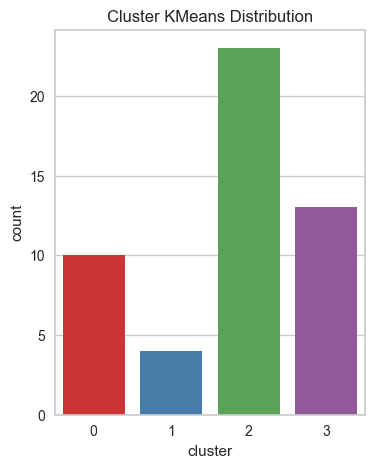

In [62]:
# visualisai berdasarkan cluster_id

plt.figure(figsize=(4, 5))
sns.countplot(data=df_final, x='cluster', palette='Set1')
plt.title('Cluster KMeans Distribution')
plt.show()

# **XII. Kesimpulan**

Exploratory Data Analysis :

-  Dari 4500 nasabah, nasabah jarang membeli barang sekali transaksi, sisa saldo nasabah kebanyakan  rendah-hampir tidak ada, credit_limit terbanyak nasabah < 5000, nasabah jarang menggunakan sistem cicilan pada transaksi, namun nasabah sangat senang membeli barang menggunakan kartu kredit 

- Seluruh data memiliki distribusi data yang tidak normal

- Pada data numerikal setiap feature memiliki korelasi yang bervariasi

Model Analysis :

- Saya mereduksi kolom menjadi 7 komponen karena merepresentasikan 93% data

- Dalam menentukan cluster saya menggunakan silhouette score karena lebih presisi dibandingkan dengan elbow method, selain itu saya membagi kedalam 4 cluster karena memiliki nilai silhouette score yang cukup tinggi dan berdasarkan silhouette visualizer cluster dengan nilai 4 memiliki persebaran data yang cukup merata di masing masing clusternya

- Diketahui bahwa populasi terbanyak dari cluster yaitu populasi terbesar yaitu nasabah relatif konsumtif, nasabah non-konsumtif, nasabah konsumtif, dan nasabah baru 

Insight :

- Cluster 0 merupakan nasabah dengan transaksi paling jarang. **Tim marketing dapat memberikan ads atau promo kepada nasabah ini agar dapat meningkatkan transaksi**

- Cluster 1 merupakan nasabah dengan pemegang kartu kredit terbaru (nasabah baru). **Tim marketing dapat memasarkan produk dengan harga dari rendah-sedang mengingat cluster ini merupakan cluster dengan nasabah baru, selain itu memberikan promo tentunya akan menjadi daya tarik sehingga meningkatkan transaksi**

- Cluster 2 merupakan nasabah dengan transaksi cukup konsumtif. **Tim marketing dapat memberikan ads kepada nasabah ini untuk dapat menarik perhatian sehingga meningkatkan minat nasabah untuk melakukan transaksi**

- Cluster 3 merupakan nasabah dengan transaksi yang sering dilakukan. **Tim marketing dapat memberikan promo kepada nasabah ini untuk meningkatkan loyalitas nasabah**

# **XIII. Conceptual Problems**

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

1. Inertia pada algorith K-Means merupakan suatu metric yang digunakan dalam mengukur jarak titik data dalam suatu cluster yang berada dekat dengan pusat (centroid).

    Fungsi Inertia :
    
    - Mengevaluasi Kualitas Clusterisasi, dimana semakin kecil nilai inertia maka clusterisasi akan semakin baik (cenderung dekat dengan centroid)

    - Menentukan Jumlah Cluster yang Optimal, Jumlah cluster yang optimal yaitu ketika nilai inertia tidak mengalami perubahan yang significant

    - Algorithm Inisialisasi Pusat Awal, inertia dapat memilih centroid lebih baik sehingga dengan inertia dan menggunakan K-Means konvergensi dapat ditingkatkan

2. 

- Elbow method digunakan untuk menghitung jumlah cluster terbaik yang ditinjau dari nilai inertia minimum.

- Penggunaan elbow method yaitu dengan melihat kurva dan memilih jumlah cluster pada sumbu x berdasarkan inertia pada sumbu y dengan perubahan inertia yang tidak terlalu significant (perubahan grafik cukup landai)

- Kelemahan pada elbow method yaitu kurang presisi dibandingkan dengan silhouette score karena cara penggunannya berdasarkan pengamatan terhadap grafik